Mean is $(8.046 \pm 0.141)$ keV
Mean is $(8.899 \pm 0.156)$ keV
Mean is $(8.008 \pm 0.164)$ keV
Mean is $(8.627 \pm 0.194)$ keV
Mean is $(9.534 \pm 0.173)$ keV
Mean is $(6.384 \pm 0.153)$ keV
Mean is $(7.459 \pm 0.149)$ keV
Mean is $(8.241 \pm 0.164)$ keV
Mean is $(6.369 \pm 0.153)$ keV
Mean is $(7.025 \pm 0.165)$ keV
Mean is $(8.042 \pm 0.216)$ keV
Mean is $(12.653 \pm 0.29)$ keV


(5.0, 14.0)

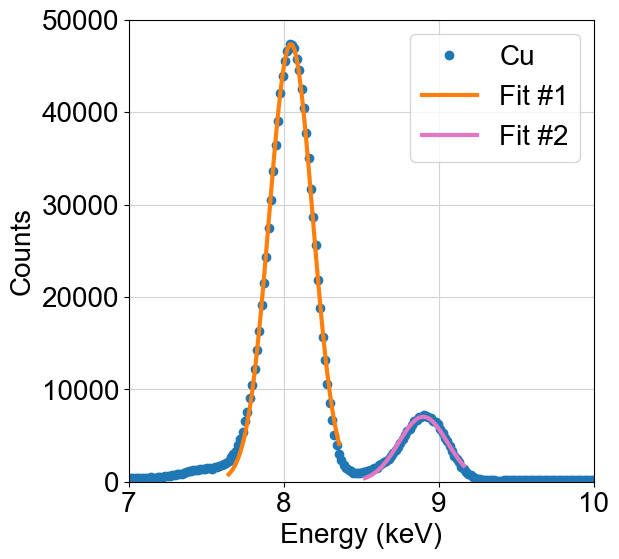

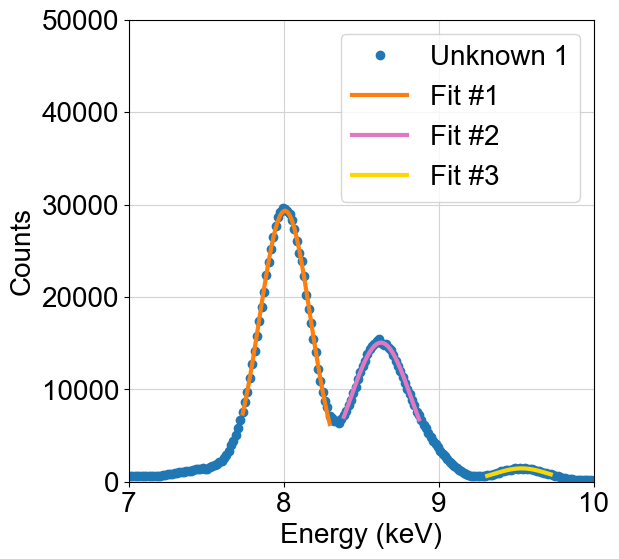

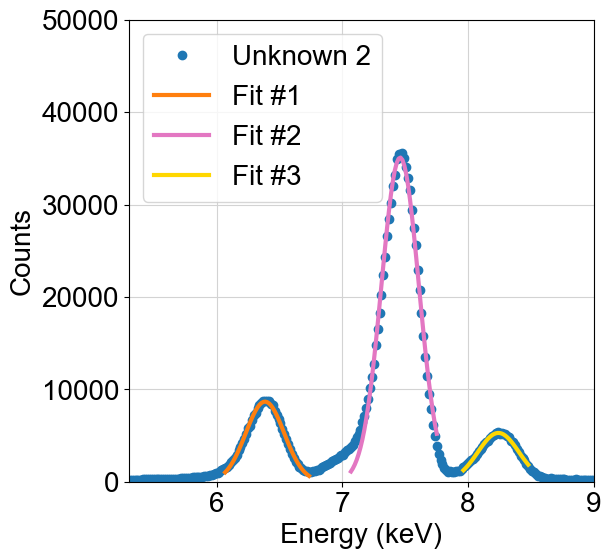

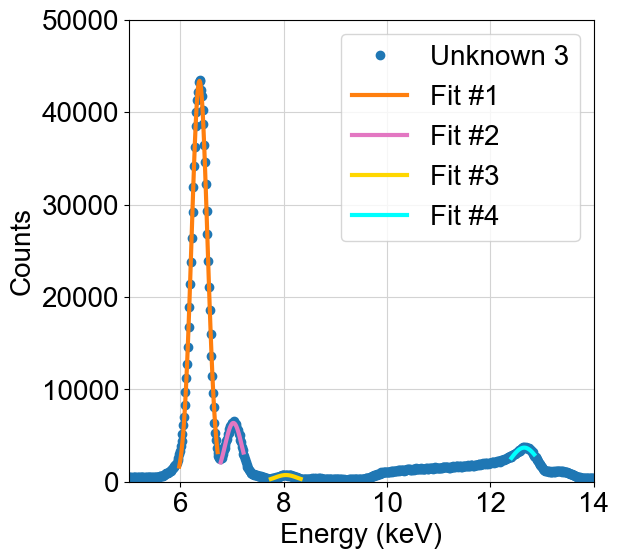

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib
from scipy.signal import find_peaks
from scipy.optimize import curve_fit


font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20
       }
matplotlib.rc('font', **font)

matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["tab:blue", "tab:orange", "tab:pink",'gold']) 


#Cu peaks Ka1 8.046, Kb1 8.904
#Ni peaks Ka1 7.48, Kb1 8.26
#Zn peaks Ka1 8.64, Kb1 9.57

#hypothesis for unknown 2: Cu + Zn (brass)
#hypothesis for unknown 3: Ni + something?
#hypothesis for unknown 4: Fe + traces of copper + maybe krypton
cu= np.genfromtxt('D:Downloads/copper_spectrum_nathan.mca',skip_header=21,delimiter='\t')
ni=np.genfromtxt('D:Downloads/nickel_spectrum_nathan.mca',skip_header=21,delimiter='\t')
u1=np.genfromtxt('D:Downloads/unknown1_spectrum_nathan.mca',skip_header=21,delimiter='\t')
u2=np.genfromtxt('D:Downloads/unknown2_spectrum_nathan.mca',skip_header=21,delimiter='\t')
u3=np.genfromtxt('D:Downloads/unknown3_spectrum_nathan.mca',skip_header=21,delimiter='\t')
u4=np.genfromtxt('D:Downloads/unknown4_spectrum_nathan.mca',skip_header=21,delimiter='\t')

cu_calib=1
cu_calib=8.046/530.485
ni_calib=7.48/453
chan=np.arange(0,len(cu))


def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
i=1
def gauss_fit(xdata,ydata,ind1,ind2,i):
    popt,pcov = curve_fit(gaus,xdata[ind1:ind2+1],ydata[ind1:ind2+1],p0=[np.max(ydata[ind1:ind2+1]),np.mean(xdata[ind1:ind2+1]),0.2])
    print("Mean is $("+str(np.around(popt[1],3))+" \pm "+str(np.around(popt[2],3))+')$ keV')
    plt.plot(chan[ind1:ind2]*cu_calib,gaus(chan[ind1:ind2]*cu_calib,*popt),label='Fit #'+str(i),lw=3)
    i=i+1



i=1
figure(1,figsize=(6,6))
plt.plot(chan*cu_calib,cu,marker='o',lw=0,label='Cu')
gauss_fit(chan*cu_calib,cu,504,552,i)
i=2
gauss_fit(chan*cu_calib,cu,562,605,i)
plt.grid(c='lightgray')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend();plt.ylim(0,50000)
plt.xlim(7,10)

i=1
figure(4,figsize=(6,6))
plt.plot(chan*cu_calib,u2,marker='o',lw=0,label='Unknown 1')
gauss_fit(chan*cu_calib,u2,510,548,i)
i=2
gauss_fit(chan*cu_calib,u2,553,586,i)
i=3
gauss_fit(chan*cu_calib,u2,614,642,i)
plt.grid(c='lightgray')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend();plt.ylim(0,50000)
plt.xlim(7,10)

i=1
figure(5,figsize=(6,6))
plt.plot(chan*cu_calib,u3,marker='o',lw=0,label='Unknown 2')
gauss_fit(chan*cu_calib,u3,400,445,i)
i=2
gauss_fit(chan*cu_calib,u3,466,512,i)
i=3
gauss_fit(chan*cu_calib,u3,525,560,i)
plt.grid(c='lightgray')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend();plt.ylim(0,50000)
plt.xlim(5.3,9)

i=1
figure(6,figsize=(6,6))
plt.plot(chan*cu_calib,u4,marker='o',lw=0,label='Unknown 3')
gauss_fit(chan*cu_calib,u4,394,444,i)
i=2
gauss_fit(chan*cu_calib,u4,447,477,i)
i=3
gauss_fit(chan*cu_calib,u4,511,550,i)
ind1=818
ind2=848
xdata=chan*cu_calib
ydata=u4
popt,pcov = curve_fit(gaus,xdata[ind1:ind2+1],ydata[ind1:ind2+1],p0=[np.max(ydata[ind1:ind2+1]),np.mean(xdata[ind1:ind2+1]),0.2])
print("Mean is $("+str(np.around(popt[1],3))+" \pm "+str(np.around(popt[2],3))+')$ keV')
plt.plot(chan[ind1:ind2]*cu_calib,gaus(chan[ind1:ind2]*cu_calib,*popt),label='Fit #4',lw=3,c='aqua')
plt.grid(c='lightgray')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend();plt.ylim(0,50000)
plt.xlim(5,14)